# Python libraries for numerical integration

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Python libraries for numerical integration

SciPy provides an "integrate" module:
[scipy.integrate documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). It provides two categories of numerical integrations:

* integrating functions given function values at points: It provides trapezoidal (**trapz**), Simpson's rule (**simps**), etc. The documentation of the function **simps** is not clear on what Simpson's rule it implements. From reading the source code, it seems that the Simpson's 1/3 rule is implemented if the data points are evenly distributed. For unevenly distribbuted data points, the formula is slightly different. Some weighted-average 1/3 rule between two adjacent segments is used. 

* integrating functions given function definitions: It provides single, double, triple, and multiple integrations (**quad**, **dblquad**, **tplquad**, etc.).

The following is an example of the first category of numerical integration functionality in Python. The integration data points are generated on the interval $[1,5]$ with $x$ spacing $dx$ =1. The values $y$ are from the function $x^2$. The analytical solution is $\frac{124}{3}\approx41.33333...$.

In [22]:
import numpy as np
from scipy import integrate

#set up the x and y values with only five data points
x = [1,2,3,4,5]
y = [1,4,9,16,25]

print("trapz result = ", integrate.trapz(y,x))
#print("trapz result = ", np.trapz(y,x))   !this also works

#set up the x and y values with ten data points
x = [1,1.5,2,2.5,3,3.5,4,4.5,5]
y = [1,2.25,4,6.25,9,12.25,16,20.25,25]

print("trapz result with refined data points = ", integrate.trapz(y,x))

#set up the x and y values with a lot more data points
x = np.linspace(1,5,10000)
y = x**2
print("trapz result with very refined data points = ", integrate.trapz(y,x))

#similary, you can also use the Simpson's rule
print("simps result = ", integrate.simps(y,x))

trapz result =  42.0
trapz result with refined data points =  41.5
trapz result with very refined data points =  41.333333440021335
simps result =  41.333333333344


The following is an example of the second category of numerical integration functionality in Python. It uses the **quad()** function of the **scipy.integrate** module. The quad function returns the integral results and an esitmate of the errror. 

In [24]:
from scipy.integrate import quad

# function we want to integrate
def func(x):
    return x**2

a = 1.0
b = 5.0

# call quad to integrate 
res, err = quad(func, a, b)

print("The integration result from quad(...) function is %f (+-%g)"%(res, err))

The integration result from quad(...) function is 41.333333 (+-4.58892e-13)


### Gauss quadrature and Legendre polynomials

Python's SciPy integrate module implements the Gauss quadrature in its **quadrature** function. Indeed, it implements an adaptive version of the Gauss quadrature with a specified tolerance. If the tolerance is not specified, a default value (~$10^{-8}$) is used.

In [25]:
from scipy import integrate

# function we want to integrate
def func(x):
    return x**2

a = 1.0
b = 5.0

# call quadrature to integrate 
res, err = integrate.quadrature(func, a, b)

print("The integration result from quadrature(...) function is %f (+-%g)"%(res, err))

The integration result from quadrature(...) function is 41.333333 (+-7.10543e-15)


We know the data points $x_i$ for the Gauss quadrature are the roots of the Legendre polynomials. In Python, you can examine the Legendre polynomials, their roots, and even the Gauss quadrature weights. The following is an example Python code to plot several Legendre polynomials and their corresponding roots. In **SciPy**, the **legendre** sub-module is in its **special** module.

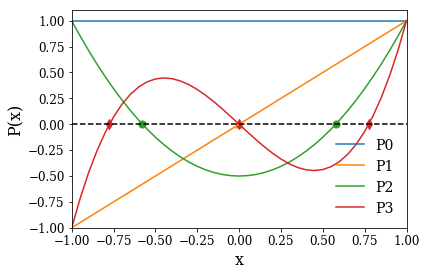

In [2]:
from scipy.special import legendre

import matplotlib.pyplot as plt
import numpy as np

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

min = -1.0
max = 1.0
step = 0.05

#generate the Legendre polynomials of degree up to 3, 
#i.e., P0, P1, P2, and P3.
for n in range(4):
    Pn = legendre(n)
    x = np.arange(min,max+step,step)
    y = Pn(x)
    plt.plot(x, y, label='P%d'%n)

#plot the roots of each Legendra polynomial above (except P0
#which has no root)
plt.scatter([], [], marker = 'x', s = 50)

#for P1
x = np.polynomial.legendre.leggauss(1)[0]
plt.scatter(x, [0], marker = '^', s = 50) 

#for P2
x = np.polynomial.legendre.leggauss(2)[0]
plt.scatter(x, [0,0], marker = 'o', s = 50) 

#for P3
x = np.polynomial.legendre.leggauss(3)[0]
plt.scatter(x, [0,0,0], marker = 'd', s = 50) 
    
#plot the x-axis    
plt.plot([-1,1],[0,0],'k--')
    
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,1.1)

#set x and y axes label and font size
plt.xlabel('x',fontsize=16)
plt.ylabel('P(x)',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower right',fontsize=14,frameon=False)
plt.savefig("legendre_polynomials.png",dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()

You can also get the Gauss quadrature nodes $x_i$ with the functions in Numpy. The following example shows how to get the nodes $x_i$ and corresponding weights $a_i$ for the 2-point Gauss quadrature rule. Note the nodes $x_i$ are defined on the interval $[-1,1]$. A linear transformation is needed if you want to use these nodes for integration on a general interval $[a,b]$.

In [27]:
import numpy as np

#get the 2-point Gauss quadrature nodes $x_0$ and $x_1$
print("2-point Gauss quadrature nodes x_i: ",np.polynomial.legendre.leggauss(2)[0])

#and the corresponding weights
print("2-point Gauss quadrature weights a_i: ", np.polynomial.legendre.leggauss(2)[1])

2-point Gauss quadrature nodes x_i:  [-0.57735027  0.57735027]
2-point Gauss quadrature weights a_i:  [1. 1.]
